In [1]:
from IPython.display import HTML, Image, YouTubeVideo
from graphviz import Graph

# MSDS688 - Artifical Intelligence

## Week 3 - Adversarial Games

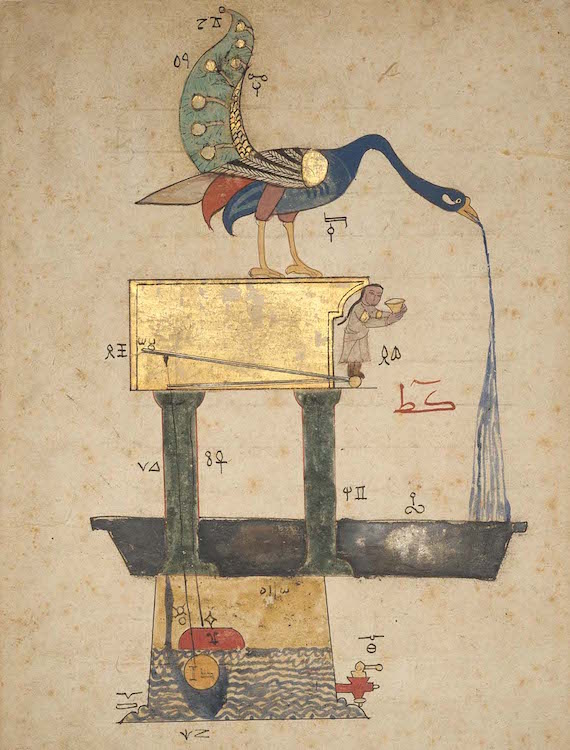

In [2]:
Image('images/peacock_fountain.jpg')

Such hydraulic automata became ubiquitous on the grounds of palaces and wealthy estates. So-called “frolicsome engines” were to be found as early as the late thirteenth century at the French chateau of Hesdin, the account books of which mention mechanical monkeys, “an elephant and a he-goat”.1 Over the next two centuries, the chateau collection expanded to include “3 personnages that spout water and wet people at will”.

Cite: Riskin, J. (n.d.). Frolicsome Engines: The Long Prehistory of Artificial Intelligence. Retrieved April 10, 2018, from [https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/](https://publicdomainreview.org/2016/05/04/frolicsome-engines-the-long-prehistory-of-artificial-intelligence/)

Today we will learn how AI can be used to play games with two players

# Lecture: Adversarial search

## Concept: Minimax algorithm

* Imagine a two-player game

* MAX --> Always wants the HIGHEST score possible

* MIN --> Always wants the LOWEST score possible

* They take turns limiting each other the worst possible moves available

## Motivation for Minimax

* During game play ...

* the more a player can anticipate the better

* In chess, predicting out 15 moves is champion-level play, 8 is unremarkable 

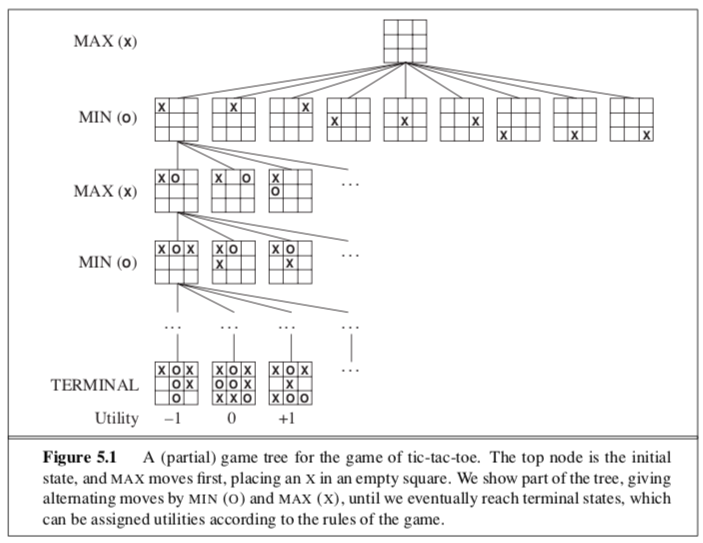

In [3]:
i = Image('images/Figure-S5-1-minmax-example.png')
i

## Minimax characteristics

* Based on DFS

* Searches to constant depth

* Evaluates each board at that depth

* Number of evaluated nodes grows exponentially
    * b == branching factor with one branch per action
    * d == depth 
    * Number of evaluated nodes = b^d

* MIN and MAX must take what the other gives

In [4]:
# Note: jupyter lab doesn't render graphs as of July 2018, you MUST use the notebook
f = Graph(strict=True)

f.attr('node', shape='doublecircle')
f.node('a', label='')
f.node('max')

f.attr('node', shape='circle')
f.node('b', label='')
f.node('c', label='')
f.node('min')

f.attr('node', shape='doublecircle')
f.node('d', label='3')
f.node('e', label='5')
f.node('f', label='2')
f.node('g', label='9')

f.edge('a', 'b')
f.edge('a', 'c')
f.edge('b', 'd')
f.edge('b', 'e')
f.edge('c', 'f')
f.edge('c', 'g')

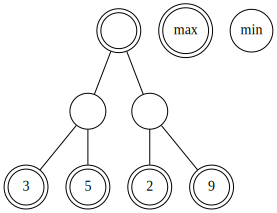

In [5]:
f

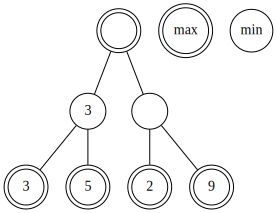

In [6]:
f.node('b', label='3')
f

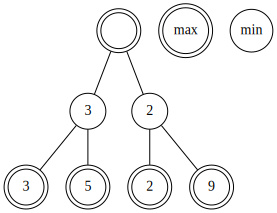

In [7]:
f.node('c', label='2')
f

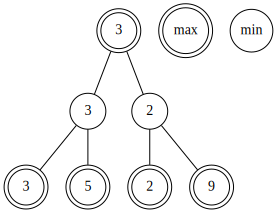

In [8]:
f.node('a', label='3')
f

## Minimax exercise

* Work through the exercise problem by hand
* After you are done find a partner 
* Come to consensus on your answer

In [9]:
g = Graph()

g.attr('node', shape='doublecircle')
g.node('a', label='')
g.node('max')

g.attr('node', shape='circle')
g.node('b', label='')
g.node('c', label='')
g.node('d', label='')
g.node('min')

g.attr('node', shape='doublecircle')
g.node('e', label='2')
g.node('f', label='7')
g.node('g', label='3')
g.node('h', label='1')
g.node('i', label='4')
g.node('j', label='2')
g.node('k', label='4')
g.node('l', label='9')
g.node('m', label='6')

g.edge('a', 'b', label='L')
g.edge('a', 'c', label='M')
g.edge('a', 'd', label='R')
g.edge('b', 'e', label='L')
g.edge('b', 'f', label='M')
g.edge('b', 'g', label='R')
g.edge('c', 'h', label='L')
g.edge('c', 'i', label='M')
g.edge('c', 'j', label='R')
g.edge('d', 'k', label='L')
g.edge('d', 'l', label='M')
g.edge('d', 'm', label='R')

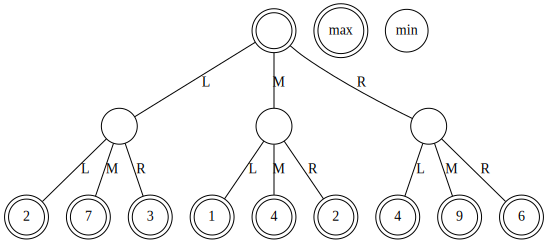

In [10]:
g

# MiniMax algorithm

__function__ MINIMAX-DECISION(_state_) __returns__ _an action_  
&emsp;__return__ arg max<sub> _a_ &Element; ACTIONS(_s_)</sub> MIN\-VALUE(RESULT(_state_, _a_))  

---
__function__ MAX\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)

&emsp;_v_ &larr; &minus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MAX(_v_, MIN\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---
__function__ MIN\-VALUE(_state_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)

&emsp;_v_ &larr; &infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MIN(_v_, MAX\-VALUE(RESULT(_state_, _a_)))  
&emsp;__return__ _v_  

---


# What is Alpha-Beta?

* Alpha-Beta is layered on top of minimax

* Alpha-Beta is sensetive to ordering

* _Uses depth-first search to determine order of evaluation_

* Alpha–beta pruning uses two parameters to determine what gets pruned

    - α = highest-value found so far for MAX along path.

    - β = lowest-value found so far for MIN along path.

* __Prunes branches that cannot provide a better outcome than what has already been found__

# Why use Alpha-Beta Pruning?

* We can prune of whole subtrees from the state-space

* Branches that _cannot_ to produce better outcomes get pruned

* What gets pruned is determined by:
    - Branches' heuristic score
    - Order of evaluation

* Better heuristic quality --> Better results

* __Doubles the depth of game tree search within the same amount of time - O(b ^ d/2)__

* Summary: Finds exactly what Minimax does, only, more efficiently

# Think of the chess competitions

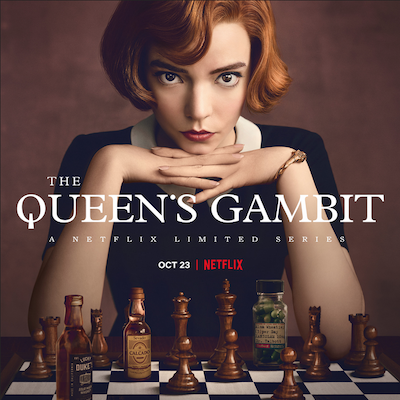

In [11]:
# Source: Netflix, 2020.  

Image('./images/queens-gambit-netflix.png')

# Minimax Result

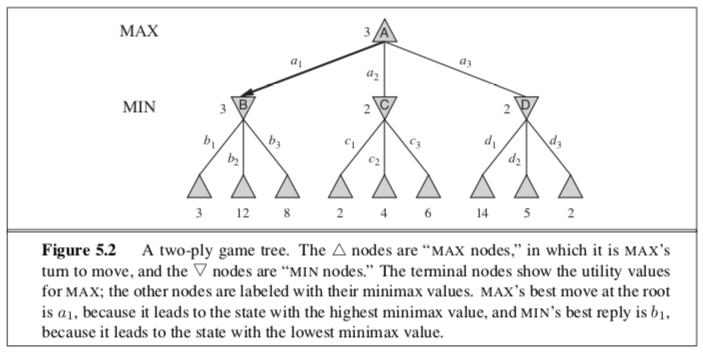

In [12]:
Image('images/Figure-S5-2-minmax-tree-example.png')

## Alpha-Beta Result

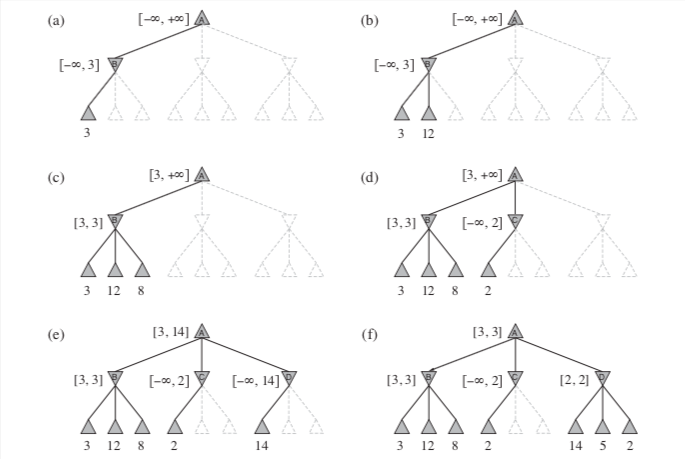

In [13]:
Image('images/Figure-S5-5-alphpabeta-pruning-example.png')

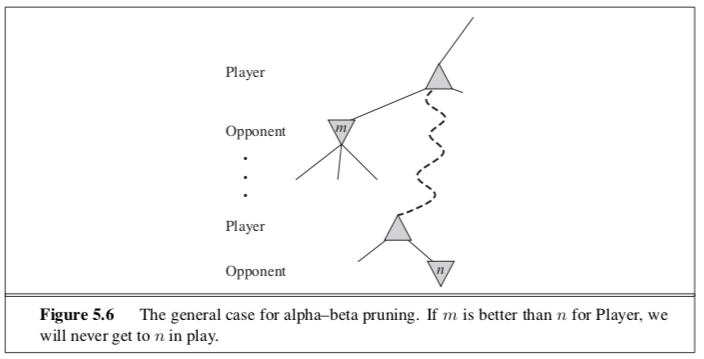

In [14]:
Image('images/Figure-S5-6-alphabeta-pruning-idea.png')

## Example -- Alpha Beta

In [15]:
# Note: jupyter lab doesn't render graphs as of July 2018, you MUST use the notebook
h = Graph(strict=True)

h.node('min')
h.node('evaluated', color='red')

h.attr('node', shape='doublecircle')
h.node('max')
h.node('a', label='')


h.attr('node', shape='circle')
h.node('b', label='')
h.node('c', label='')


h.attr('node', shape='doublecircle')
h.node('d', label='3')
h.node('e', label='5')
h.node('f', label='2')
h.node('g', label='9')

h.edge('a', 'b')
h.edge('a', 'c')
h.edge('b', 'd')
h.edge('b', 'e')
h.edge('c', 'f')
h.edge('c', 'g')

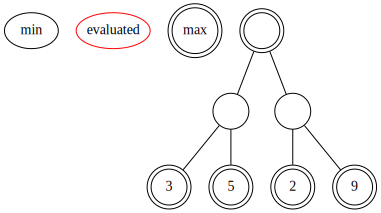

In [16]:
h

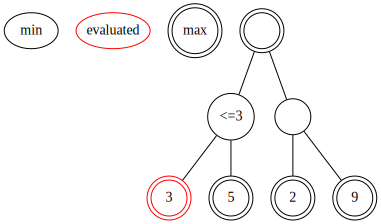

In [17]:
h.node('d', color='red')
h.node('b', label=' <=3')
h

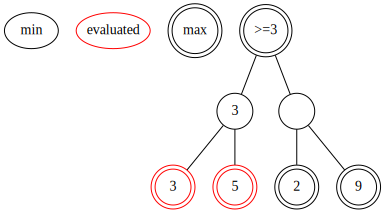

In [18]:
h.node('e', color='red')
h.node('b', label='3')
h.node('a', label='>=3')
h

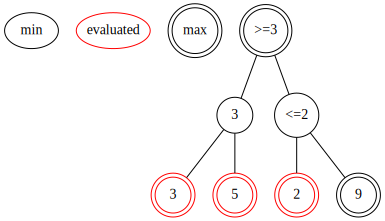

In [19]:
h.node('c', label='<=2')
h.node('f', color='red')
h.node('g', label='9')
h

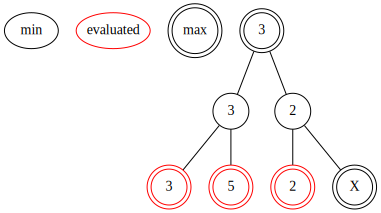

In [20]:
h.node('g', label='X')
h.node('c', label='2')
h.node('a', label='3')
h

# Why do we want to avoid static evaluations?

* Evaluation of scores requires computational resources

* Think: function calls, CPU time, memory

* Think about evaluating a chess board and checkmate in particular

* Position of the king w.r.t. all other pieces.  O(n^2)

* Similar evaluation needed for all other pieces

* Better moves are selected using better heuristic estimates

* Better heuristics generally require more resources to produce

# How does Alpha-Beta work?

__function__ ALPHA-BETA-SEARCH(_state_) __returns__ an action  
&emsp;_v_ &larr; MAX\-VALUE(_state_, &minus;&infin;, &plus;&infin;)  
&emsp;__return__ the _action_ in ACTIONS(_state_) with value _v_  

---
__function__ MAX\-VALUE(_state_, _&alpha;_, _&beta;_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)

&emsp;_v_ &larr; &minus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MAX(_v_, MIN\-VALUE(RESULT(_state_, _a_), _&alpha;_, _&beta;_))  
&emsp;&emsp;&emsp;__if__ _v_ &ge; _&beta;_ __then return__ _v_  
&emsp;&emsp;&emsp;_&alpha;_ &larr; MAX(_&alpha;_, _v_)  
&emsp;__return__ _v_  

---
__function__ MIN\-VALUE(_state_, _&alpha;_, _&beta;_) __returns__ _a utility value_  
&emsp;__if__ TERMINAL\-TEST(_state_) __then return__ UTILITY(_state_)

&emsp;_v_ &larr; &plus;&infin;  
&emsp;__for each__ _a_ __in__ ACTIONS(_state_) __do__  
&emsp;&emsp;&emsp;_v_ &larr; MIN(_v_, MAX\-VALUE(RESULT(_state_, _a_), _&alpha;_, _&beta;_))  
&emsp;&emsp;&emsp;__if__ _v_ &le; _&alpha;_ __then return__ _v_  
&emsp;&emsp;&emsp;_&beta;_ &larr; MIN(_&beta;_, _v_)  
&emsp;__return__ _v_  


# Practice Exercises - Alpha-Beta

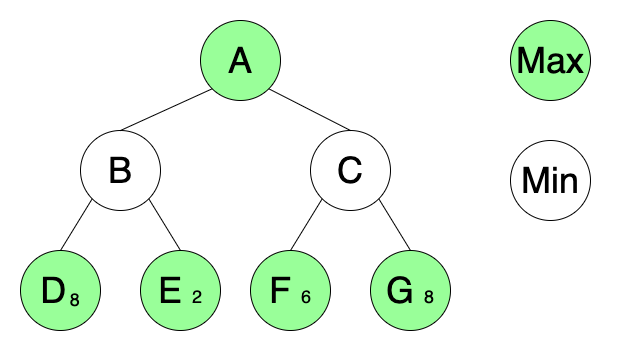

In [23]:
Image('./images/minimax-small-graph.png')

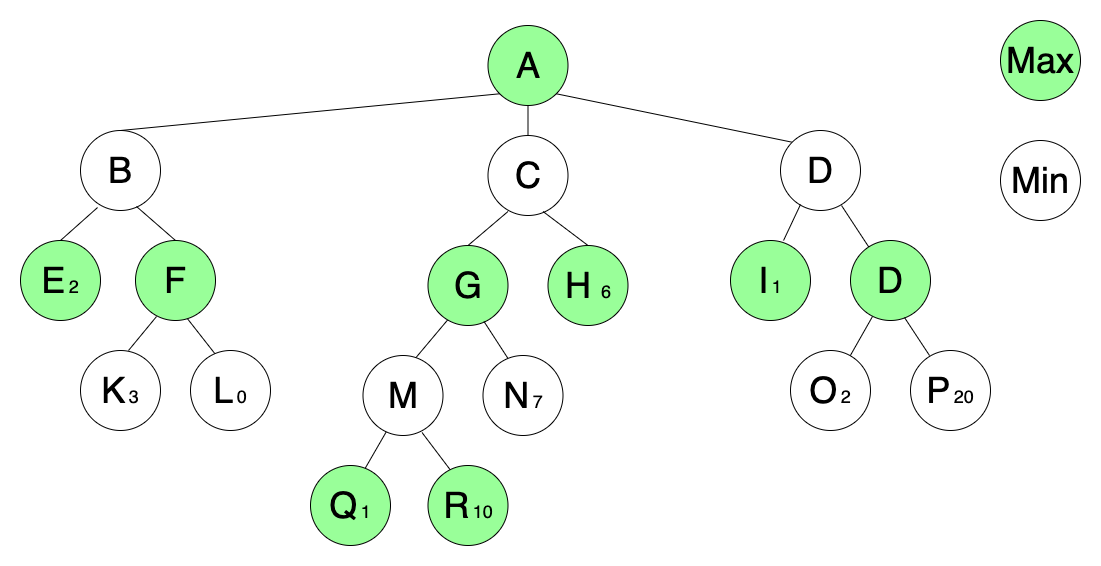

In [24]:
Image('./images/minimax-challenge-small-graph.png')

# Improvement: Depth limited search

* Only lets DFS go _so_ deep

* Example: 5 layers

* Why: You need to _try_ to have a move ready when it's your turn again

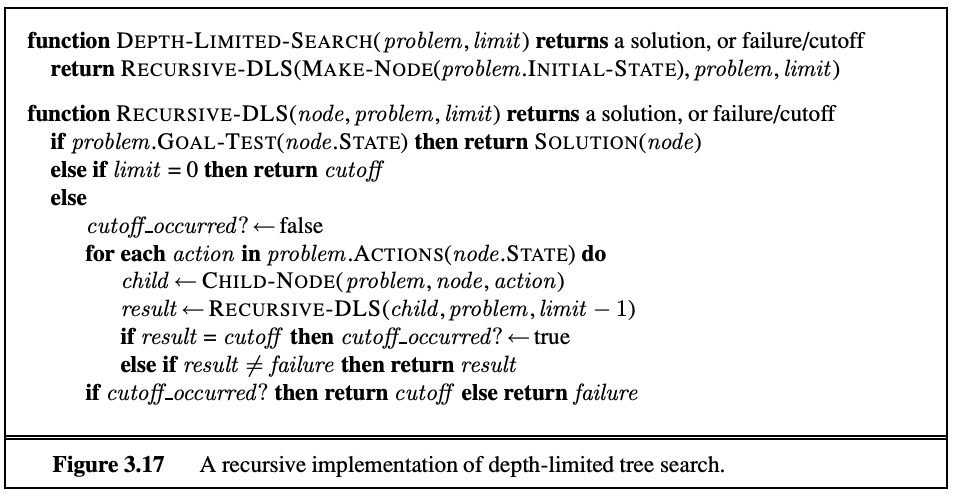

In [25]:
Image('./images/figure-3.17-depth-limited-search.png')

# Improvement: Iterative Deepening

* Iteratively, call Depth Limited Search for deeper and deeper levels

* _Guarantees_ you will have a move ready when the time comes

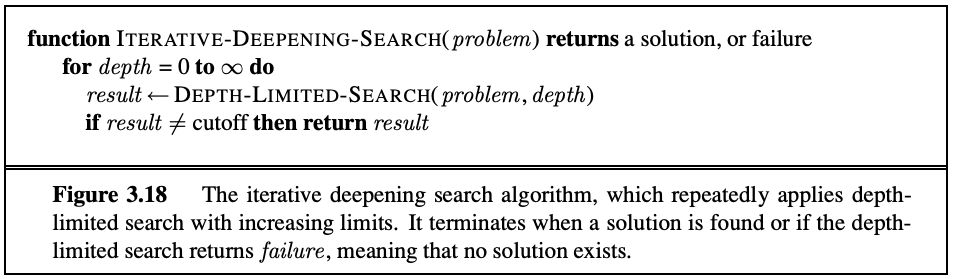

In [26]:
Image('./images/figure-3.18-iterative-deepening.png')

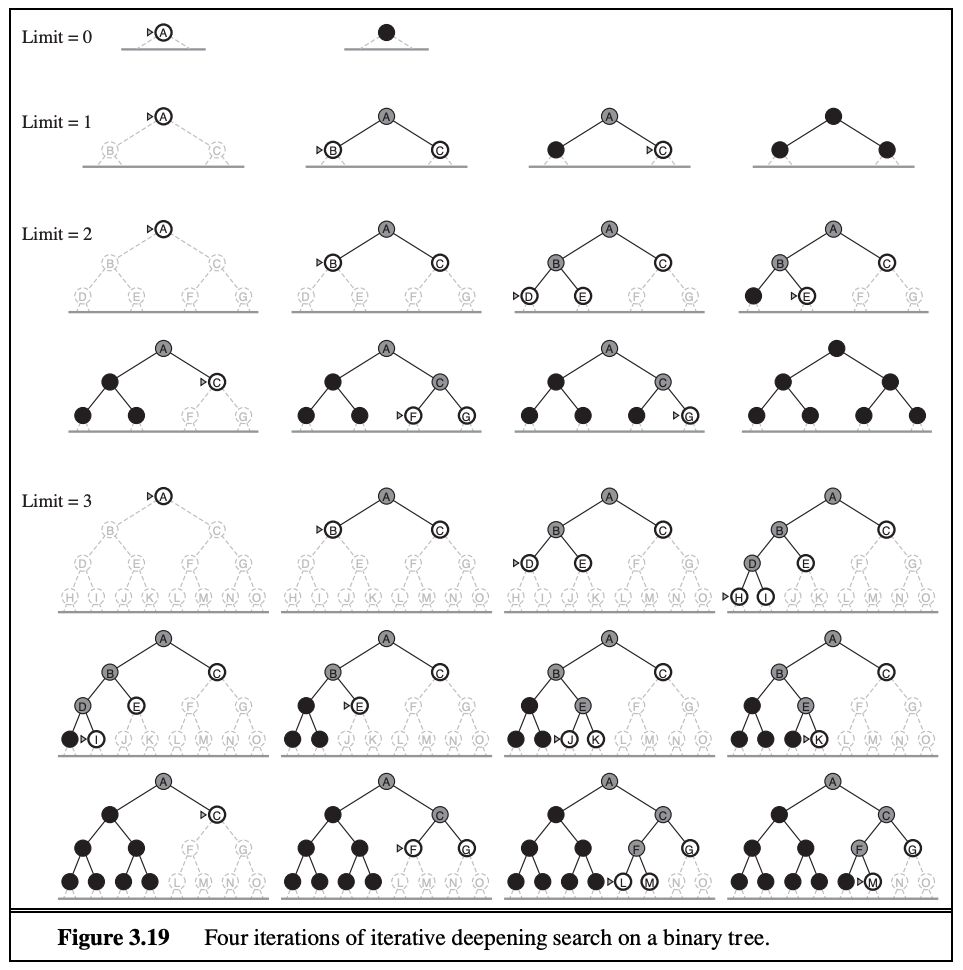

In [27]:
Image('./images/figure-3.19-iterative-deepening-in-action.png')

## Summary

 * Minimax - Evaluates game tree allowing player to make better choices

 * Alpha-Beta
     - Makes Minimax more efficient
     
     - Allows for better move selection 
     
     - Sensetive to order of evaluation

 * Iterative Deepening

    - Gradually increase depth of search into the game tree

    - Assures that an answer is always available when needed

    - Maximizes alpha-beta's results by sorting subtrees using previous static evaluations

    - Caching (storing) previously static evaluations significanlty performance too